In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import pyplot

In [2]:
ap = pd.read_csv("/Users/test/Downloads/Blackfriday.csv")
ap.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [3]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
ap.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
ap.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
ap.sort_values('User_ID').head(10)
ap['User_ID'].value_counts().count() 

5891

In [7]:
ap['Gender'].unique()

array(['F', 'M'], dtype=object)

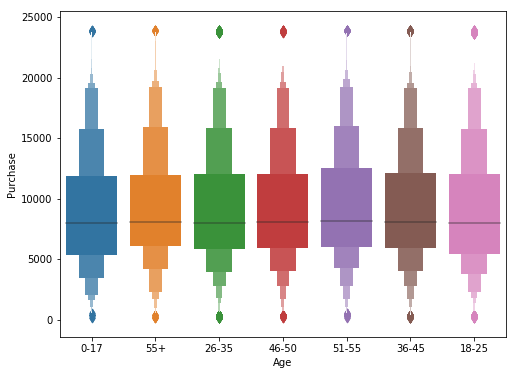

In [28]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Age', y='Purchase', data=ap)

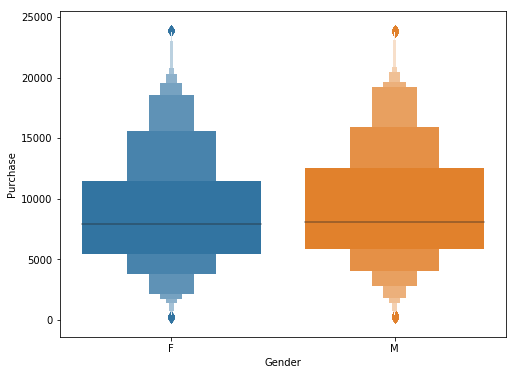

In [29]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Gender', y='Purchase', data=ap)

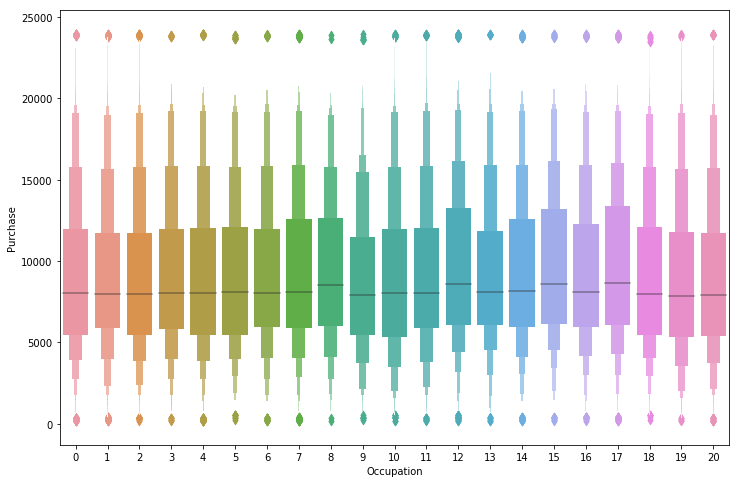

In [31]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='Occupation', y='Purchase', data=ap)

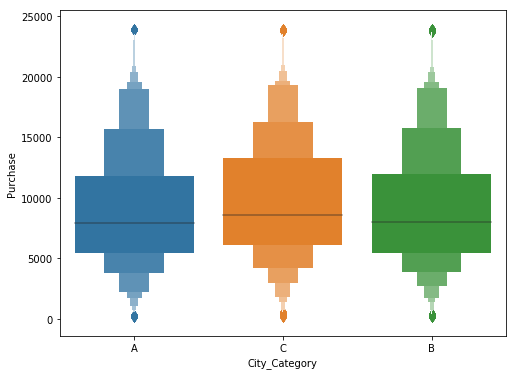

In [32]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='City_Category', y='Purchase', data=ap)

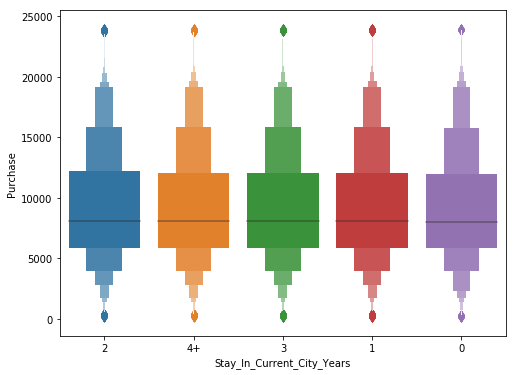

In [33]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Stay_In_Current_City_Years', y='Purchase', data=ap)


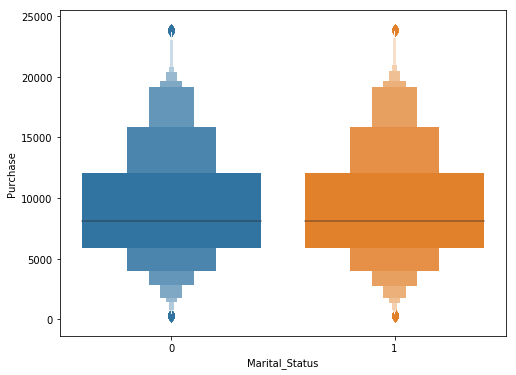

In [36]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x='Marital_Status', y='Purchase', data=ap)

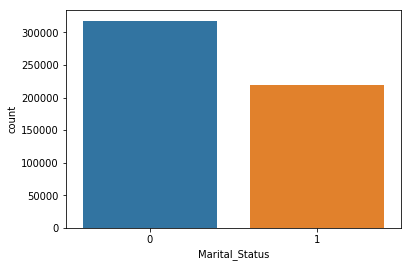

In [10]:
sns.countplot(ap['Marital_Status'])

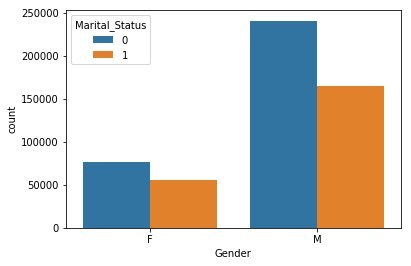

In [11]:
sns.countplot(ap['Gender'], hue = ap['Marital_Status'])

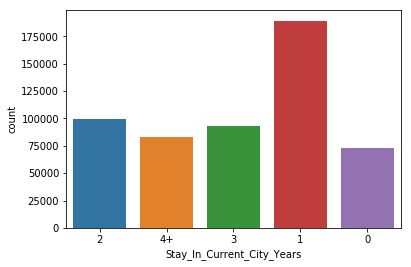

In [12]:
sns.countplot(ap['Stay_In_Current_City_Years'])

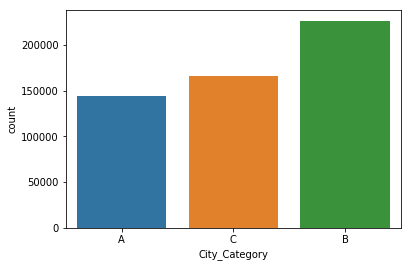

In [13]:
sns.countplot(ap['City_Category'])

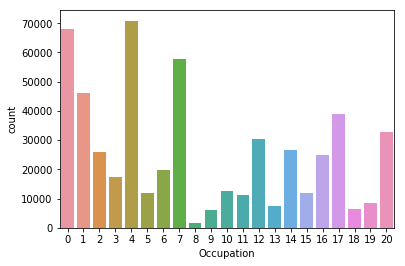

In [14]:
sns.countplot(ap['Occupation'])

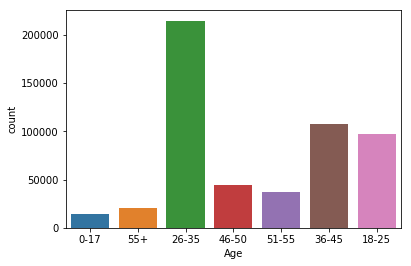

In [15]:
sns.countplot(ap['Age'])

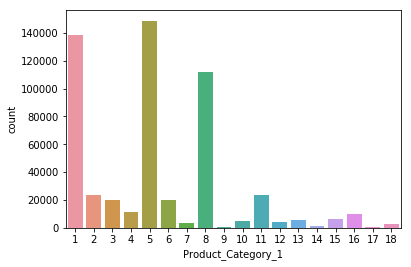

In [16]:
sns.countplot(ap['Product_Category_1'])

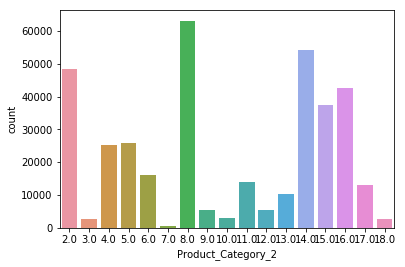

In [17]:
sns.countplot(ap['Product_Category_2'])

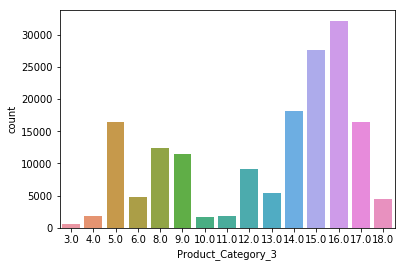

In [18]:
sns.countplot(ap['Product_Category_3'])

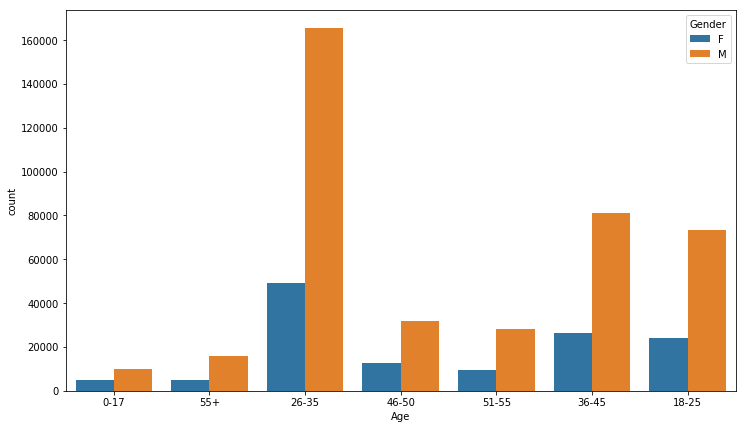

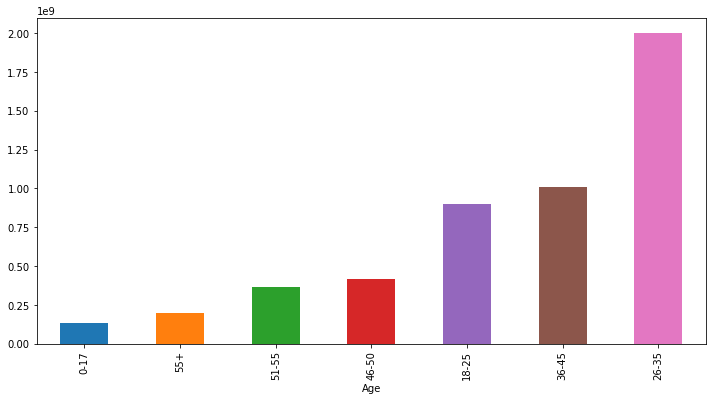

In [19]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(ap['Age'],hue=ap['Gender'])

def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    ap.groupby(group)[column].sum().sort_values().plot(plot)
plot('Age','Purchase','bar')

In [20]:
# Generate new features - total # products purchased by customer; and total amount 
tot_item = ap['User_ID'].value_counts().sort_index()
tot_purchase = ap.groupby('User_ID').sum()['Purchase']
tot = pd.concat([tot_item, tot_purchase], axis = 1, keys = ['Tot_Products', 'Tot_Purchase'])

ap = pd.merge(ap, tot, left_on = 'User_ID', right_index = True)
ap.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Tot_Products,Tot_Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,34,333481
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,34,333481
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,34,333481
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,34,333481
39180,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842,34,333481


In [24]:
# Look at correlations between total amount of purchase and characteristics of customer
ap_customer = ap.copy()
ap_customer.drop(['Product_Category_1', 'Purchase'], axis = 1, inplace = True)
chars = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for var in chars:
    print(ap_customer.groupby(var).describe()['Tot_Purchase'])
    
#ap_customer.groupby('Gender').describe()['Tot_Purchase']

           count          mean           std      min       25%        50%  \
Gender                                                                       
F       132197.0  1.628282e+06  1.276808e+06  44108.0  613353.0  1280575.0   
M       405380.0  2.004322e+06  1.533994e+06  45551.0  845450.0  1639991.0   

              75%         max  
Gender                         
F       2357711.0   6186498.0  
M       2770340.0  10536783.0  
          count          mean           std      min       25%        50%  \
Age                                                                         
0-17    14707.0  1.359364e+06  1.310641e+06  75906.0  511747.0   893273.0   
18-25   97634.0  1.794635e+06  1.271695e+06  46070.0  751094.0  1563502.0   
26-35  214690.0  2.079734e+06  1.499561e+06  44432.0  908219.0  1802555.0   
36-45  107499.0  2.007388e+06  1.675028e+06  55900.0  801953.0  1568057.0   
46-50   44526.0  1.910906e+06  1.556345e+06  62250.0  688372.0  1345682.0   
51-55   37618.0  1.5

In [25]:
# Generate new features - total # products purchased by customer; and total amount 
tot_item = ap['User_ID'].value_counts().sort_index()
tot_purchase = ap.groupby('User_ID').sum()['Purchase']
tot = pd.concat([tot_item, tot_purchase], axis = 1, keys = ['Tot_Products', 'Tot_Purchase'])

ap = pd.merge(ap, tot, left_on = 'User_ID', right_index = True)
ap.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Tot_Products_x,Tot_Purchase_x,Tot_Products_y,Tot_Purchase_y
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,34,333481,34,333481
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,34,333481,34,333481
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,34,333481,34,333481
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,34,333481,34,333481
39180,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842,34,333481,34,333481


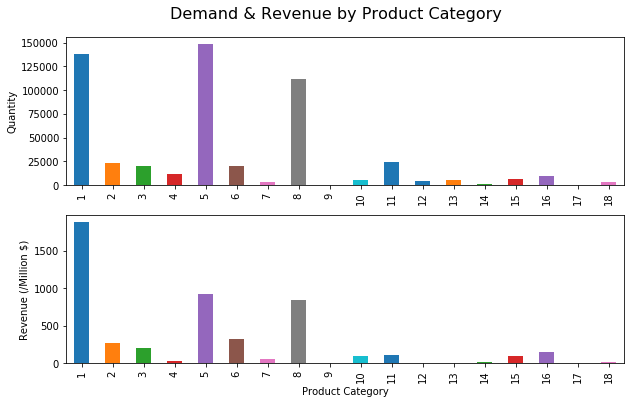

In [26]:
# Data Exploration
#1) Demand & revenue by product category:
# 3 best sellers are product category 5, 1, 8. While product category 1 generated a lot more revenue than 5 & 8,
# about twice as much - could potentially allocate more resource to product category 5, 1 & 8, especially category
# 1, e.g. more stock, for next Black Friday
fig1, axes = plt.subplots(2, 1, figsize = (10, 6))

fig1.suptitle('Demand & Revenue by Product Category', fontsize = 16, y = 0.95)

demand_product_cat = ap['Product_Category_1'].value_counts().sort_index()
demand_product_cat.plot(kind = 'bar', ax = axes[0])
plt.sca(fig1.axes[0])
plt.ylabel('Quantity')

revenue_product_cat = ap.groupby('Product_Category_1').sum()['Purchase']/1000000 # $(in million)
revenue_product_cat.plot(kind = 'bar', ax = axes[1])
plt.sca(fig1.axes[1])
plt.xlabel('Product Category')
plt.ylabel('Revenue (/Million $)')

plt.savefig('fig1.png')

In [34]:
ap = pd.read_csv("/Users/test/Downloads/Blackfriday.csv")
ap.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


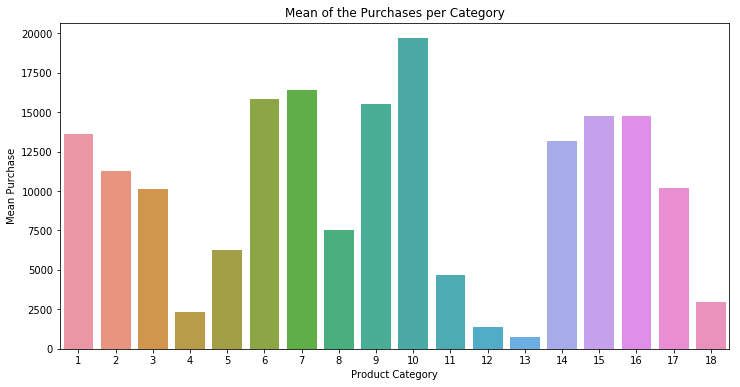

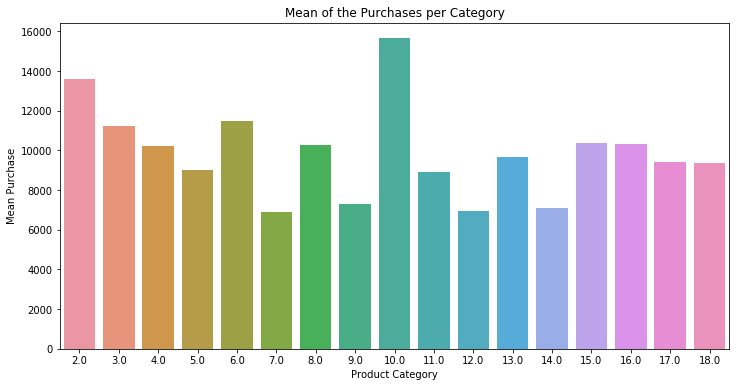

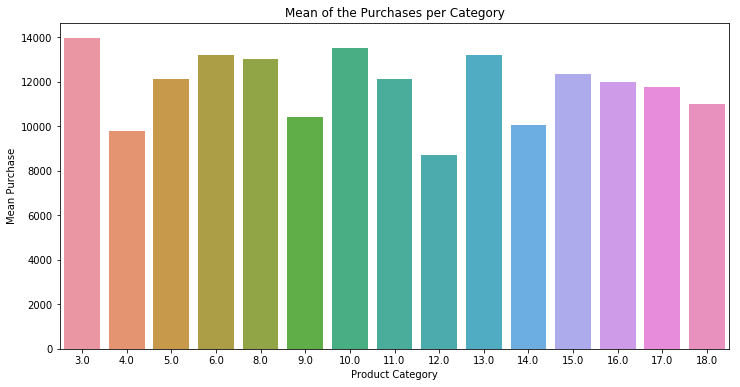

In [35]:
##Customer Purchasing Behavior
# Get to know data - Product_ID, Product_Category*
# 3,623 distinct products, grouped into 18 main categories (i.e. Product_Category_1)
# Drop product category 2 & 3 - lots of missing values 
# Drop Product_ID - may not be very informative to look at individual product
ap['Product_ID'].value_counts().count()
ap['Product_Category_1'].value_counts(dropna = False).sort_index()
ap['Product_Category_2'].value_counts(dropna = False).sort_index()
ap['Product_Category_3'].value_counts(dropna = False).sort_index()

ap = ap.drop(['Product_ID', 'Product_Category_2', 'Product_Category_3'], axis = 1)


category = []
mean_purchase = []


for i in ap['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(ap[ap['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()


ap = pd.read_csv("/Users/test/Downloads/Blackfriday.csv")

category = []
mean_purchase = []


for i in ap['Product_Category_2'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(ap[ap['Product_Category_2']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

category = []
mean_purchase = []


for i in ap['Product_Category_3'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(ap[ap['Product_Category_3']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()